# Graduate Admission

### This dataset is created for prediction of Graduate Admissions from an Indian perspective.

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

* GRE Scores ( out of 340 )
* TOEFL Scores ( out of 120 )
* University Rating ( out of 5 )
* Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
* Undergraduate GPA ( out of 10 )
* Research Experience ( either 0 or 1 )
* Chance of Admit ( ranging from 0 to 1 )

# Import the Required Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = np.genfromtxt('Admission_Predict.csv',delimiter = ',', dtype=str);
df

array([['Serial No.', 'GRE Score', 'TOEFL Score', ..., 'CGPA',
        'Research', 'Chance of Admit'],
       ['1', '337', '118', ..., '9.65', '1', '0.92'],
       ['2', '324', '107', ..., '8.87', '1', '0.76'],
       ...,
       ['398', '330', '116', ..., '9.45', '1', '0.91'],
       ['399', '312', '103', ..., '8.78', '0', '0.67'],
       ['400', '333', '117', ..., '9.66', '1', '0.95']], dtype='<U17')

# Extract headers and data

In [3]:
headers = df[0,1:]; # TO not take serial no
print(headers)
data = np.array(df[1:,1:], dtype=float); # This will take from the GRE Score
print(data)

['GRE Score' 'TOEFL Score' 'University Rating' 'SOP' 'LOR ' 'CGPA'
 'Research' 'Chance of Admit']
[[337.   118.     4.   ...   9.65   1.     0.92]
 [324.   107.     4.   ...   8.87   1.     0.76]
 [316.   104.     3.   ...   8.     1.     0.72]
 ...
 [330.   116.     4.   ...   9.45   1.     0.91]
 [312.   103.     3.   ...   8.78   0.     0.67]
 [333.   117.     4.   ...   9.66   1.     0.95]]


# Visualise the distribution of independent and dependent variables

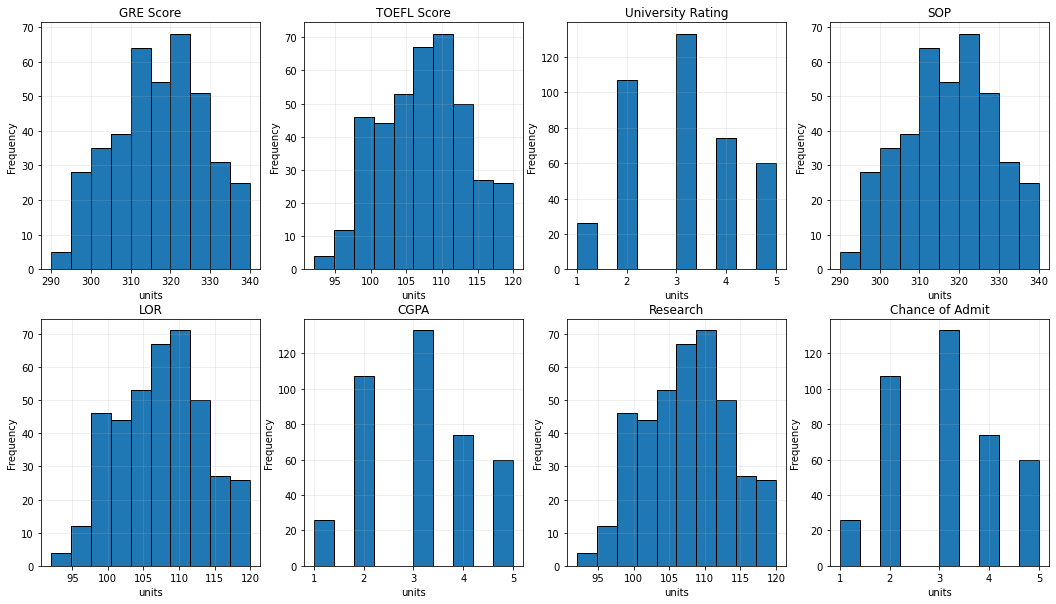

In [4]:
'''Create subplots in 1 row and 3 columns'''
fig, ax = plt.subplots(2,4)
fig.set_figheight(10)
fig.set_figwidth(20)
fig.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(2,4,1)
plt2 = plt.subplot(2,4,2)
plt3 = plt.subplot(2,4,3)
plt4 = plt.subplot(2,4,4)
plt5 = plt.subplot(2,4,5)
plt6 = plt.subplot(2,4,6)
plt7 = plt.subplot(2,4,7)
plt8 = plt.subplot(2,4,8)


plt1.hist(data[:,0], label='GRE Score', edgecolor='black')
plt1.set_title('GRE Score')
plt1.set_xlabel('units')
plt1.set_ylabel('Frequency')
plt1.grid(axis='both', alpha=.25)

plt2.hist(data[:,1], label='TOEFL Score', edgecolor='black')
plt2.set_title('TOEFL Score')
plt2.set_xlabel('units')
plt2.set_ylabel('Frequency')
plt2.grid(axis='both', alpha=.25)

plt3.hist(data[:,2], label='University Rating', edgecolor='black')
plt3.set_title('University Rating')
plt3.set_xlabel('units')
plt3.set_ylabel('Frequency')
plt3.grid(axis='both', alpha=.25)

plt4.hist(data[:,0], label='SOP', edgecolor='black')
plt4.set_title('SOP')
plt4.set_xlabel('units')
plt4.set_ylabel('Frequency')
plt4.grid(axis='both', alpha=.25)

plt5.hist(data[:,1], label='LOR', edgecolor='black')
plt5.set_title('LOR')
plt5.set_xlabel('units')
plt5.set_ylabel('Frequency')
plt5.grid(axis='both', alpha=.25)

plt6.hist(data[:,2], label='CGPA', edgecolor='black')
plt6.set_title('CGPA')
plt6.set_xlabel('units')
plt6.set_ylabel('Frequency')
plt6.grid(axis='both', alpha=.25)

plt7.hist(data[:,1], label='Research', edgecolor='black')
plt7.set_title('Research')
plt7.set_xlabel('units')
plt7.set_ylabel('Frequency')
plt7.grid(axis='both', alpha=.25)

plt8.hist(data[:,2], label='Chance of Admit', edgecolor='black')
plt8.set_title('Chance of Admit')
plt8.set_xlabel('units')
plt8.set_ylabel('Frequency')
plt8.grid(axis='both', alpha=.25)

In [5]:
data_norm = (data-np.mean(data, axis = 0))/np.std(data, axis = 0)

In [6]:
# Extract y from data

y_label = 'Chance of Admit';
y_index = np.where(headers == y_label)[0][0];
y = data_norm[:,y_index];

# Extract x from data

X = data_norm[:,0:y_index];

In [7]:
# Insert column of 1's for intercept column

X = np.insert(X, 0, 1, axis=1) #Here you added the intercept right

In [8]:
print(X.shape)

(400, 8)


In [9]:
print(X[0]) #Normalized values

[1.         1.76210664 1.74697064 0.79882862 1.09386422 1.16732114
 1.76481828 0.90911166]


In [10]:
print(headers)  #You dont need serial No.  ok. There are total 9. +1 intercept 

['GRE Score' 'TOEFL Score' 'University Rating' 'SOP' 'LOR ' 'CGPA'
 'Research' 'Chance of Admit']


In [11]:
y.shape

(400,)

In [12]:
m = X.shape[0]
n = X.shape[1]

In [13]:
def h(X,theta):
    return X.dot(theta)

In [14]:
def cost(theta, X, y):
    return (h(X, theta) - y).T.dot(h(X, theta) - y)/2

In [15]:
# Gradient of cost function

def gradient(X, y, theta):
    grad = X.T.dot(h(X, theta) - y)
    return grad

In [16]:
def gradient_descent(X, y, theta_initial, alpha, num_iters):
    J_per_iter = np.zeros(num_iters)
    gradient_per_iter = np.zeros((num_iters,len(theta_initial)))
    theta = theta_initial
    for iter in np.arange(num_iters):
        grad = gradient(X, y, theta)
        theta = theta - alpha * grad
        J_per_iter[iter] = cost(theta, X, y)
        gradient_per_iter[iter] = grad.T
    return (theta, J_per_iter, gradient_per_iter)

# gradient_descent(X, y, np.array([0, 10]), 0.001, 10)  #Same here

# Optimize the parameters using gradient descent

In [17]:
theta_initial = np.zeros((X.shape[1],1))
alpha = 0.0005
iterations = 1000
theta, costs, grad = gradient_descent(X,np.array([y]).T,theta_initial,alpha,iterations)
print('Theta values ', theta)

Theta values  [[ 9.07968145e-16]
 [ 1.39783600e-01]
 [ 1.24258432e-01]
 [ 4.58476504e-02]
 [-2.33355774e-02]
 [ 1.40830779e-01]
 [ 4.97342141e-01]
 [ 8.57053356e-02]]


# Visualize the loss

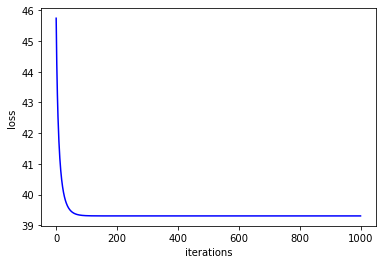

In [18]:
x_loss = np.arange(0,iterations,1)

plt.plot(x_loss, costs, 'b-')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

# Goodness of fit

$R^2$ is a statistic that will give some information about the goodness of fit of a regression model. 
The $R^2$ coefficient of determination is 1 when the regression predictions perfectly fit the data.We have the theta values from the gradient method. We need to use then to predict target variable(Y_predicted) then use it to calculate the R squared value($R^2$ ).

\begin{align}
\ R^2 = 1 - \frac{\sum_{i=1}^{m} \left( y^{\left(i\right)}-\hat{y}^\left(i\right) \right)^2}
{\sum_{i=1}^{m} \left( y^{\left(i\right)}-\bar{y}^\left(i\right) \right)^2}
\end{align}

In [19]:
y_predicted =  h(X,theta)
r_square = 1 - np.square(y - y_predicted.T).sum()/np.square(y - y.mean()).sum()
print(r_square)

0.8034713719824395


### An  𝑅2  of 0.80 indicates an extremely good fit to the data.

# Transform standardized data back to original scale
We can transform standardized predicted values, y_predicted into the orginal data scale using

$$y_{\text{norm}} = \sigma_y y + \mu_y$$ 

In [20]:
# Compute mean and standard deviation of data

sigma = np.array(np.std(data,axis=0))
mu = np.array(np.mean(data,axis=0))

# De-normalize y

y_predicted =  np.round(h(X, theta) * sigma[-1] + mu[-1],2)

# Print first five values of y_predicted

print(y_predicted[0:5,:])

[[0.95]
 [0.81]
 [0.65]
 [0.74]
 [0.64]]


# Normal Equation

Let's try to do normal equation and see the performance of the model.  

In [21]:
def normal_equation(X,y,theta):
    X_transpose = np.transpose(X) #calculate tranpose
    X_transpose_dot_X = X_transpose.dot(X) #Calculate the dot product
    T1 = np.linalg.inv(X_transpose_dot_X) #Calulate inverse
    T2 = X_transpose.dot(y)
    theta = T1.dot(T2)
    return(theta,T1,T2)

In [22]:
theta_initial = np.zeros((X.shape[1],1))
iterations = 1000
theta, costs, grad = normal_equation(X,np.array([y]).T,theta_initial)
print('Theta values ', theta)

Theta values  [[ 8.70408612e-16]
 [ 1.39783600e-01]
 [ 1.24258432e-01]
 [ 4.58476504e-02]
 [-2.33355774e-02]
 [ 1.40830779e-01]
 [ 4.97342141e-01]
 [ 8.57053356e-02]]


In [23]:
# Goodness of fit
y_predicted =  h(X,theta)
r_square = 1 - np.square(y - y_predicted.T).sum()/np.square(y - y.mean()).sum()
print(r_square)

0.8034713719824395


An 𝑅2 of 0.80 indicates an extremely good fit to the data. In fact ,the accuracy is same as gradient descent.